# **🚢 타이타닉 호에서 누가 살아남았나?!**

## **1. 프로젝트 목적 및 정의**

>  **목적: 데이터를 분석하기 이전에 결측치 처리, 값 수정이 필요하여 데이터 가공 방법을 연습할 수 있습니다.**
>
> 타이타닉호는 1912년 4월 15일 항해 중에 빙산과 충돌한 후 침몰했습니다.  
> 불행하게도 구명보트가 충분하지 않아고 승객과 승무원 2224명 중 1502명이 사망했습니다.
>
> https://www.encyclopedia-titanica.org 에는 탑승자에 대한 데이터가 남아있습니다.  
> 이를 보면 일부 그룹의 사람들이 다른 그룹보다 생존 가능성이 더 높았던 것으로 보인다고 합니다. 
>
> 어떤 특징의 사람들이 더 높은 생존률을 보였는지 분석해 봅시다. 
>
> 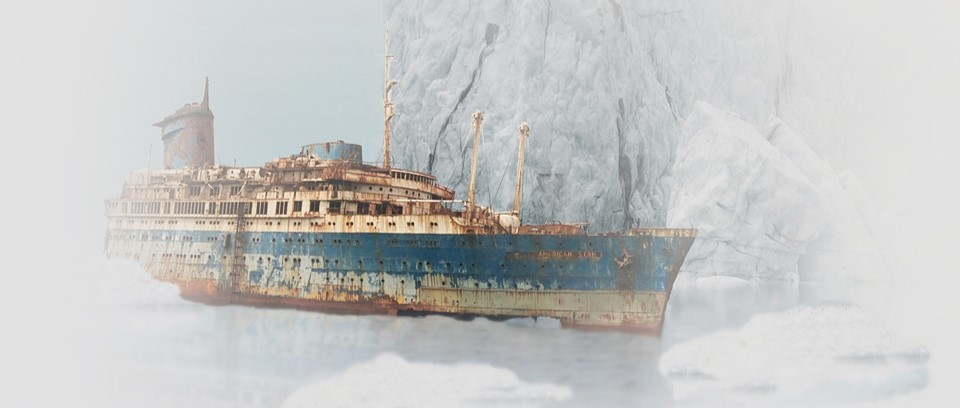

## **2. 데이터 설명**

> 캐글은 데이터 분석 대회를 제공하는 개발자 커뮤니티입니다.  
> 타이타닉 탑승자의 데이터를 이용해 어떤 특징의 탑승자가 얼마의 확률로 생존할 수 있었을지지 예측하는 대회가 있었습니다.  
> (캐글 대회 페이지: https://www.kaggle.com/competitions/titanic/overview )  
>  
> 대회에서 사용된 데이터는 아래와 같은 특징을 담고있습니다.   
> * **survived**:  생존자는 1, 희생자는 0
> * **age**:  1세 이상은 정수, 1세 미만은 소수로 표현
> * **fare**:  요금
> * **class**:  객실 등급
> * **who**:  남성(man), 여성(woman), 15세 이하(child)
> * **deck**:  선실 구역
> * **embark_town**:  승선지
> * **alone**:  홀로 탑승했다면 1 가족과 함께 탔으면 0




## **3. 데이터 불러와서 확인하기**

> 타이타닉 데이터는 seaborn 라이브러리를 통해 판다스 데이터 형태로 얻을 수 있습니다.   
> 우선, 판다스 라이브러리를 이용하기 위해 pd로 축약하여 불러와야 합니다. 

In [1]:
import pandas as pd

> seaborn 라이브러리를 통해 데이터를 불러옵니다.  
> 중복되는 의미의 열이 많아서 9개의 열만 선택하여 저장하겠습니다. 

In [2]:
import seaborn as sns
df = sns.load_dataset('titanic')[["survived", "age", "fare", "class", "who", "deck", "embark_town", "alone"]]

df

,survived,age,fare,class,who,deck,embark_town,alone
0,0,22.0,7.2500,Third,man,NaN,Southampton,False
1,1,38.0,71.2833,First,woman,C,Cherbourg,False
2,1,26.0,7.9250,Third,woman,NaN,Southampton,True
3,1,35.0,53.1000,First,woman,C,Southampton,False
4,0,35.0,8.0500,Third,man,NaN,Southampton,True
...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,Second,man,NaN,Southampton,True
887,1,19.0,30.0000,First,woman,B,Southampton,True
888,0,NaN,23.4500,Third,woman,NaN,Southampton,False
889,1,26.0,30.0000,First,man,C,Cherbourg,True


> 데이터를 확인하는 함수 중 info를 이용하여 총 승객의 수, 데이터의 타입, 그리고 결측값 수를 알아봅시다.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   age          714 non-null    float64 
 2   fare         891 non-null    float64 
 3   class        891 non-null    category
 4   who          891 non-null    object  
 5   deck         203 non-null    category
 6   embark_town  889 non-null    object  
 7   alone        891 non-null    bool    
dtypes: bool(1), category(2), float64(2), int64(1), object(2)
memory usage: 38.0+ KB


> 총 891명의 승객 데이터가 있습니다.  
> 또한 나이(age), 선실구역(deck), 승선지(embark_town)에는 결측값이 많이 있습니다.

> 결측값을 처리하기 전에 우선 describe 함수를 이용해 특징별로 데이터를 분석해 봅시다. 

In [4]:
df.describe()

,survived,age,fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


> 생존여부(survived)의 중앙값(50%)는 0 이고 제3사분위수(75%)는 1이므로 생존자의 비율이 25%와 50% 사이임을 알 수 있습니다.  
> 생존여부(survived)의 평균값(mean)이 0.38이므로 생존자의 비율이 38%였음을 알 수 있습니다.  
>
> 나이(age)의 최솟값은 0.42로 돌이 지나지 않은 아기도 탑승했고, 최댓값은 80이므로 80세 노인도 탑승했습니다.  
> 나이(age)의 평균값(mean)은 30으로 탑승객의 평균나이는 30세 였습니다.  
>
> 요금(fare)의 경우 최솟값이 0으로 승무원은 요금을 내지 않았거나 무임승차한 경우도 있었을 수도 있습니다.  

In [5]:
df.describe(include='O')

,who,embark_town
count,891,889
unique,3,3
top,man,Southampton
freq,537,644


> who에는 여성, 남성, 15세 이하 세 그룹이 있습니다.  
> 891명 중 537명이 남성이었음을 알 수 있습니다. 
>
> 승선지(embark_town)은 889명의 데이터가 있는데 대다수인 644명이 모두 Southampton에서 승선했음을 알 수 있습니다. 

> 다음 문제를 통해 category 타입의 데이터 통계를 확인해 봅시다. 

<a class="jcecodle-mk jcecodle-mk__problem-chip" data-problem-id="n7JXblBYBxo" href='#jce-judge/open/n7JXblBYBxo' target='_self'><span>판다스 - 데이터 가공 프로젝트 - 문제1</span></a>


> 객실등급(class)은 1등석, 2등석, 3등석이 있었습니다.  
> 절반 이상의 탑승객은 3등석 티켓으로 승선했음을 알 수 있습니다. 
>
> 객실위치(deck)는 203명에 대한 데이터만 남아 있습니다.  
> 7가지 타입으로 나뉘었고 C타입이 가장 많습니다.  
>
> 객실위치의 경우 데이터가 전체 승객의 절반에 대해서도 남아있지 않아 정확히 분석할 수 없습니다. 


## **4. 결측값 처리하기**

### (1) 결측값이 있는 데이터 삭제하기

> 위에서 객실위치(deck)의 경우 전체 891명 중 203명에 데이터만 남아있어 전체 승객에 대해 분석하기에는 양이 모자랍니다.  
> 따라서 객실위치 열은 삭제하여 사용하지 않으려고 합니다.  
>
> drop 함수를 이용하여 deck 열을 삭제해 봅시다.  

In [7]:
df.drop(columns='deck', inplace=True)

df

,survived,age,fare,class,who,embark_town,alone
0,0,22.0,7.2500,Third,man,Southampton,False
1,1,38.0,71.2833,First,woman,Cherbourg,False
2,1,26.0,7.9250,Third,woman,Southampton,True
3,1,35.0,53.1000,First,woman,Southampton,False
4,0,35.0,8.0500,Third,man,Southampton,True
...,...,...,...,...,...,...,...
886,0,27.0,13.0000,Second,man,Southampton,True
887,1,19.0,30.0000,First,woman,Southampton,True
888,0,NaN,23.4500,Third,woman,Southampton,False
889,1,26.0,30.0000,First,man,Cherbourg,True


> 탑승객의 나이(age)의 경우에도 891명 중 714명의 데이터만 남아있습니다.  
> 나이는 생존율과 높은 관계가 있을 것으로 생각되므로 열을 삭제하지 않고 행을 삭제하겠습니다. 
>
> 다음 문제를 통해 dropna 함수를 이용하여 나이 데이터가 없는 탑승객 데이터를 삭제해 봅시다. 

<a class="jcecodle-mk jcecodle-mk__problem-chip" data-problem-id="362vR3-jZY8" href='#jce-judge/open/362vR3-jZY8' target='_self'><span>판다스 - 데이터 가공 프로젝트 - 문제2</span></a>


### (2) 결측값 대체하기

> info 함수를 이용해 결측값을 확인해보았더니 승선지(embark_town)에 2개의 결측값이 존재합니다.  
> describe 함수로 통계량을 확인하였을때, 승선지의 경우 과반수의 승객이 Southampton에서 승선했음을 알 수 있었습니다.  
> 2개 정도의 소량의 데이터는 과반을 차지하는 데이터로 대체해주어도 전체적인 통계량에 전혀 영향을 주지 않습니다.  
>
> 다음 문제를 통해 fillna 함수를 이용하여 2개의 결측값을 Southampton으로 대체해주세요. 

<a class="jcecodle-mk jcecodle-mk__problem-chip" data-problem-id="EG1FvEm74pI" href='#jce-judge/open/EG1FvEm74pI' target='_self'><span>판다스 - 데이터 가공 프로젝트 - 문제3</span></a>


## **5. 그룹으로 나누어 분석하기**

### (1) 생존자/희생자 그룹으로 나누어 분석하기

> groupby 함수를 이용해 생존 여부로 데이터를 나누어 각 특징의 통계값을 확인해 봅시다. 

In [10]:
df.groupby(by=['survived']).describe()

age                                                       fare  \
          count       mean        std   min   25%   50%   75%   max  count   
survived                                                                     
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0  424.0   
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0  290.0   

                                                                        
               mean        std  min      25%      50%    75%       max  
survived                                                                
0         22.965456  31.448825  0.0   7.8958  11.8875  26.55  263.0000  
1         51.843205  70.458776  0.0  13.0000  26.2500  66.20  512.3292

> 나이(age)의 경우, 희생자의 평균은 30세이고 생존자의 평균은 28세로 큰 차이가 없어 보입니다.  
>
> 요금(fare)의 경우, 희생자의 평균은 23, 생존자의 평균은 52로 두배 이상의 차이가 있습니다.  
> 따라서 더 높은 요금을 낸 탑승객이 더 많이 생존했음을 알 수 있습니다.  

In [11]:
df.groupby(by=['survived']).describe(include='O')

who                    embark_town                         
         count unique    top freq       count unique          top freq
survived                                                              
0          424      3    man  341         424      3  Southampton  353
1          290      3  woman  169         290      3  Southampton  203

> who의 통계 결과를 보면, 희생자 424명 중 341명이 남성입니다.  
> 반면 생존자의 경우 290명 중 169명이 여성으로 가장 많았습니다.  
> 전체 탑승객 중 남성이 비율이 컸음에도 불구하고 생존자에는 많지 않은것으로 보아 여성의 생존율이 높을 것으로 예상할 수 있습니다.  
>
> 승전지의 경우 생존/희생자 모두 Southampton 승선자가 많기 때문에 승선지는 생존율에 영향을 미치지 않은 것으로 보입니다. 

> 다음 문제를 통해 category 데이터를 생존자/희생자 그룹으로 나누어 통계값을 확인해 봅시다. 

<a class="jcecodle-mk jcecodle-mk__problem-chip" data-problem-id="270tyrqTHT4" href='#jce-judge/open/270tyrqTHT4' target='_self'><span>판다스 - 데이터 가공 프로젝트 - 문제4</span></a>


> 객실등급(class)의 경우 희생자 424명 중 270명은 3등석에 있었습니다.  
> 반면 생존자 290명 중 122명은 1등석 승객으로 가장 많았습니다. 
> 전체 탑승객 중에는 3등석 승객이 가장 많았으나 생존율이 낮았음을 알 수 있습니다. 

### (2) 생존율과 관련있는 특징으로 나누어 분석하기

> 위에서 생존율에 영향을 미친것으로 보이는 특징은 요금(fare), who, 객실등급(class)가 있었습니다.  
> 이중에 요금은 객실등급과 관련이 있으므로 생략합시다. 
>
> who, class 열 기준으로 데이터를 나누어 생존율의 통계값을 확인해 봅시다. 

In [13]:
df.groupby(by=['who'])['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
who,,,,,,,,
child,83.0,0.590361,0.494757,0.0,0.0,1.0,1.0,1.0
man,413.0,0.174334,0.379857,0.0,0.0,0.0,0.0,1.0
woman,218.0,0.775229,0.418392,0.0,1.0,1.0,1.0,1.0


> survived 데이터는 생존자는 1, 희생자는 0이므로 이들의 평균값은 생존율과 같습니다.  
> 
> 15세 이하의 승객의 생존율은 59%  
> 남성 승객의 생존율은 17%  
> 여성 승객의 생존율은 78% 입니다. 
>
> 이 결과를 볼때 구명보트에 오르는 순간 여성과 아이들에게 우선 순위가 주어졌음을 예상해볼 수 있습니다.  
> 
> 또한 아이들의 생존율이 여성보다는 낮은 것으로 보아 위급 상황에서 어린 아이들의 신체 능력상 탈출이 어려웠을 것이라는 예상도 할 수 있습니다.  

> 다음 문제를 통해 class열을 기준으로 그룹으로 나누어 생존율을 분석해 봅시다. 

<a class="jcecodle-mk jcecodle-mk__problem-chip" data-problem-id="ZC_uuGtxGNM" href='#jce-judge/open/ZC_uuGtxGNM' target='_self'><span>판다스 - 데이터 가공 프로젝트 - 문제5</span></a>


> 1등석 승객의 생존율은 66%  
> 2등석 승객의 생존율은 48%    
> 3등석 승객의 생존율은 24% 입니다.  
>
> 객실 등급이 높을수록 생존율이 약 20% 증가합니다.  
> 이것으로 객실의 등급 즉 위치가 생존율에 큰 영향을 미쳤을 것으로 예상할 수 있습니다.  

> 위의 두 특징을 조합하여(예: 1등석의 남성) 그룹으로 나누어 생존율을 확인해 봅시다. 

In [15]:
df.groupby(by=['who', 'class'])['survived'].describe()

count      mean       std  min  25%  50%  75%  max
who   class                                                     
child First     6.0  0.833333  0.408248  0.0  1.0  1.0  1.0  1.0
      Second   19.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
      Third    58.0  0.431034  0.499546  0.0  0.0  0.0  1.0  1.0
man   First    98.0  0.377551  0.487267  0.0  0.0  0.0  1.0  1.0
      Second   90.0  0.066667  0.250841  0.0  0.0  0.0  0.0  1.0
      Third   225.0  0.128889  0.335824  0.0  0.0  0.0  0.0  1.0
woman First    82.0  0.975610  0.155207  0.0  1.0  1.0  1.0  1.0
      Second   64.0  0.906250  0.293785  0.0  1.0  1.0  1.0  1.0
      Third    72.0  0.430556  0.498629  0.0  0.0  0.0  1.0  1.0

> 15세 이하의 1/2등석 승객의 생존율은 83% 이상으로 매우 높습니다.  
> 반면 15세 이하의 3등석 승객의 생존율은 43%로 큰 차이가 납니다.  
>
> 3등석의 승객들을 분석해보면, 15세 이하 43% / 여성 43% / 남성 13% 인 것을 확인할 수 있습니다.  
> 3등석의 경우 위치적으로 생존율에 매우 불리했지만,  
> 이곳에서도 어린 아이들과 여성들에게 생존의 우선순위를 부여했음을 알 수 있습니다.  
> 또한 3등석의 어린 아이들과 여성의 생존율이 같은 것으로 보아 위에서 아이들이 신체적으로 불리하여 생존율이 낮았다고 예상한 것은 틀린 분석입니다.  
>
> 여성의 경우 1/2등석 승객의 생존율이 거의 비슷합니다.  
> 반면 남성의 경우 1등석 승객의 생존율이 38% / 2등은 1%로 큰 차이가 납니다.  
> 3등석을 포함한 전체 그룹 중 2등석 남성 승객의 생존율이 현저히 낮은 특별한 이유가 있었을 것으로 예상할 수 있습니다.  



## **6. 생존자의 특징 찾기**

> 위에서 찾은 특징 이외에 또 다른 분석이 있다면 적어봅시다.  

> 여러분은 어느 그룹에 속하나요?  
> 자신이 타이타닉 탑승자라면 생존할 수 있었는지 예측해 봅시다. 